    RegionID  RegionName       City State      Metro CountyName  SizeRank  \
0      96651       92109  San Diego    CA  San Diego  San Diego       142   
1      96667       92126  San Diego    CA  San Diego  San Diego       165   
2      96657       92115  San Diego    CA  San Diego  San Diego       356   
3      96646       92104  San Diego    CA  San Diego  San Diego       361   
4      96690       92154  San Diego    CA  San Diego  San Diego       393   
5      96647       92105  San Diego    CA  San Diego  San Diego       411   
6      96664       92122  San Diego    CA  San Diego  San Diego       475   
7      96659       92117  San Diego    CA  San Diego  San Diego       489   
8      96669       92128  San Diego    CA  San Diego  San Diego       497   
9      96671       92130  San Diego    CA  San Diego  San Diego       639   
10     96602       92037  San Diego    CA  San Diego  San Diego       747   
11     96645       92103  San Diego    CA  San Diego  San Diego       803   

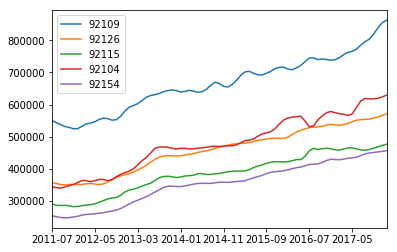

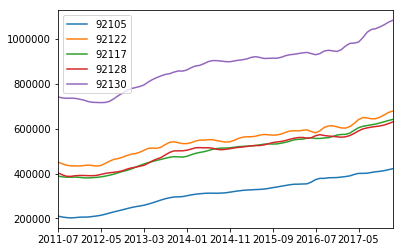

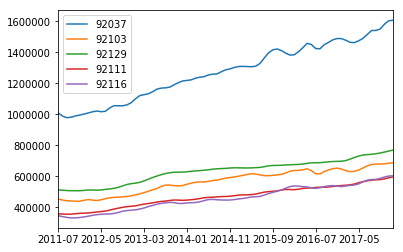

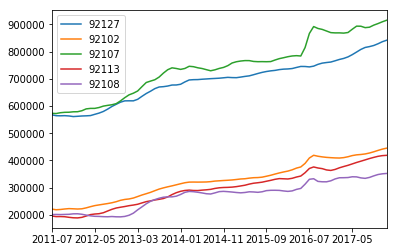

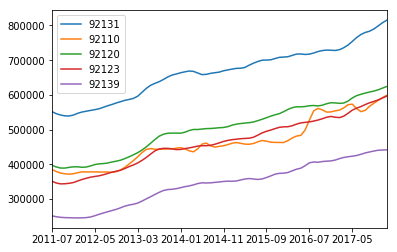

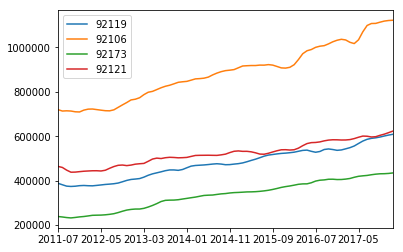

                 10
2011-07  1.0088e+06
2011-08      988900
2011-09      978400
2011-10      981100
2011-11      989600
2011-12      995000
2012-01  1.0016e+06
2012-02  1.0087e+06
2012-03  1.0164e+06
2012-04  1.0209e+06
2012-05   1.017e+06
2012-06  1.0196e+06
2012-07  1.0417e+06
2012-08  1.0556e+06
2012-09  1.0553e+06
2012-10   1.055e+06
2012-11  1.0608e+06
2012-12  1.0746e+06
2013-01  1.1002e+06
2013-02  1.1206e+06
2013-03  1.1268e+06
2013-04  1.1325e+06
2013-05  1.1454e+06
2013-06  1.1626e+06
2013-07   1.169e+06
2013-08  1.1711e+06
2013-09  1.1755e+06
2013-10  1.1903e+06
2013-11  1.2044e+06
2013-12  1.2153e+06
...             ...
2015-08     1396400
2015-09     1416400
2015-10     1421400
2015-11     1411500
2015-12     1394500
2016-01     1382100
2016-02     1384500
2016-03     1404100
2016-04     1429800
2016-05     1458000
2016-06     1450200
2016-07     1424100
2016-08     1423100
2016-09     1449500
2016-10     1464500
2016-11     1480800
2016-12     1489200
2017-01     1488400


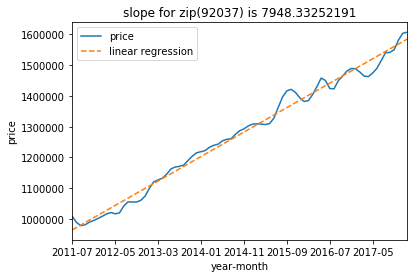

[ 964454.2721519     7948.33252191]
1608269.20643
0.098895295523


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#data=pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')
data=pd.read_csv('Zip_Zhvi_AllHomes.csv')
data_sd = data[data.City == 'San Diego'].dropna(axis=0)
data_sd = data_sd.reset_index(drop=True)
print data_sd
for i in range(6):
    data_clip = data_sd.iloc[i*5:i*5+5,:]
    data_clip = data_clip.set_index(data_clip.RegionName.values)
    data_plt = data_clip.iloc[:,190:]
    plt.figure(i+1)
    data_plt.T.plot()
    plt.show()
plt.figure(7)
f = [[1,k] for k in range(79)]
thetaset1,resd1,rank,s=np.linalg.lstsq(f,data_sd.iloc[10][190:].values)
data_test = data_sd.iloc[10,190:].T
data_test = data_test.to_frame(name = None)
print data_test
x = np.arange(79)
y = thetaset1[0]+thetaset1[1]*x
data_test[1] = y
data_test[10].plot(label='price')
data_test[1].plot(linestyle='--',label='linear regression')
plt.legend()
plt.title('slope for zip({}) is {}'.format(data_sd.RegionName[10],thetaset1[1]))
plt.xlabel(u'year-month')
plt.ylabel(u'price')
plt.show()
print thetaset1
print y[-1]+thetaset1[1]*3
print thetaset1[1]/thetaset1[0]*12

In [22]:
slope=[]
for i in range(29):
    theta,resd1,rank,s=np.linalg.lstsq(f,data_sd.loc[i][190:].values)
    #slope.append(theta[1])
    slope.append(theta[1]/theta[0]*12)
print 'The max slope is {}, and its zipcode is {}'.format(max(slope),data_sd.RegionName.values[slope.index(max(slope))])



    

The max slope is 0.196702614159, and its zipcode is 92113


In [23]:
data_sd.RegionName.values

array([92109, 92126, 92115, 92104, 92154, 92105, 92122, 92117, 92128,
       92130, 92037, 92103, 92129, 92111, 92116, 92127, 92102, 92107,
       92113, 92108, 92131, 92110, 92120, 92123, 92139, 92119, 92106,
       92173, 92121])

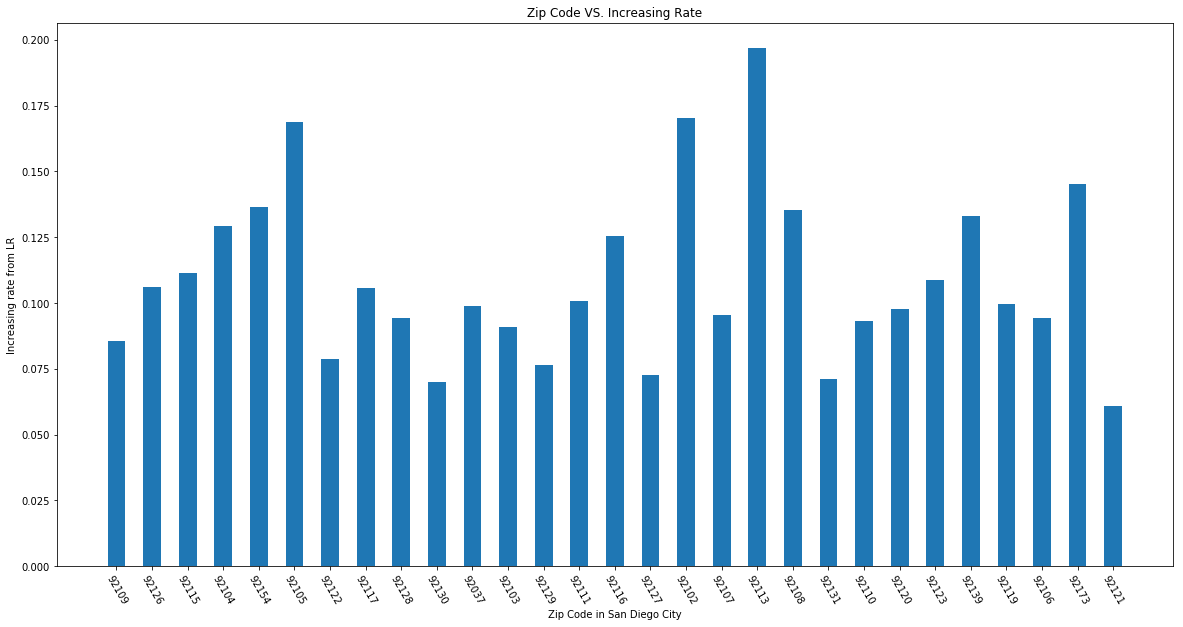

In [24]:
ind=range(29)
plt.figure(figsize=(20,10))
plt.bar(ind,slope,0.5)
plt.xticks(ind,data_sd.RegionName.values,rotation=-60)
plt.xlabel(u'Zip Code in San Diego City')
plt.ylabel(u'Increasing rate from LR')
plt.title('Zip Code VS. Increasing Rate')
plt.show()

    RegionID  RegionName       City State      Metro CountyName  SizeRank  \
0      96651       92109  San Diego    CA  San Diego  San Diego       142   
1      96667       92126  San Diego    CA  San Diego  San Diego       165   
2      96657       92115  San Diego    CA  San Diego  San Diego       356   
3      96646       92104  San Diego    CA  San Diego  San Diego       361   
4      96690       92154  San Diego    CA  San Diego  San Diego       393   
5      96647       92105  San Diego    CA  San Diego  San Diego       411   
6      96664       92122  San Diego    CA  San Diego  San Diego       475   
7      96659       92117  San Diego    CA  San Diego  San Diego       489   
8      96669       92128  San Diego    CA  San Diego  San Diego       497   
9      96671       92130  San Diego    CA  San Diego  San Diego       639   
10     96602       92037  San Diego    CA  San Diego  San Diego       747   
11     96645       92103  San Diego    CA  San Diego  San Diego       803   

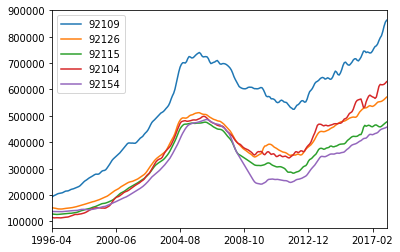

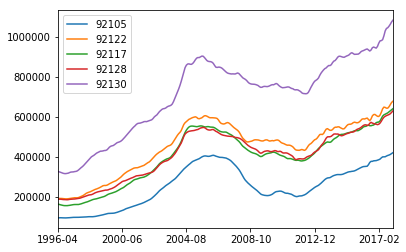

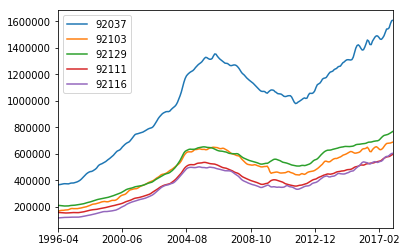

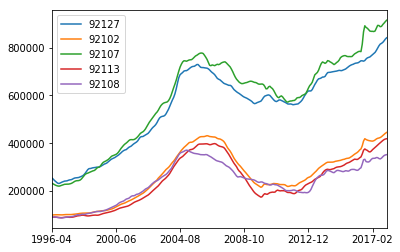

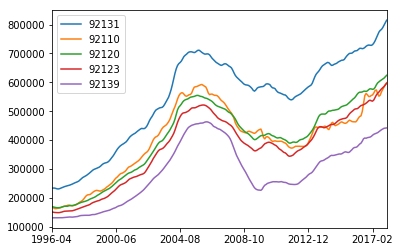

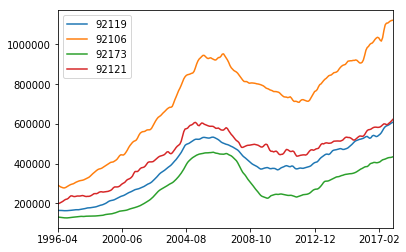

              10
1996-04   365200
1996-05   366600
1996-06   368300
1996-07   370800
1996-08   372500
1996-09   373600
1996-10   373500
1996-11   372700
1996-12   372300
1997-01   375000
1997-02   378300
1997-03   378900
1997-04   379100
1997-05   381600
1997-06   384900
1997-07   388300
1997-08   393300
1997-09   399500
1997-10   407700
1997-11   418000
1997-12   428600
1998-01   438900
1998-02   447800
1998-03   455100
1998-04   460900
1998-05   464900
1998-06   466100
1998-07   470400
1998-08   476900
1998-09   483100
...          ...
2015-08  1396400
2015-09  1416400
2015-10  1421400
2015-11  1411500
2015-12  1394500
2016-01  1382100
2016-02  1384500
2016-03  1404100
2016-04  1429800
2016-05  1458000
2016-06  1450200
2016-07  1424100
2016-08  1423100
2016-09  1449500
2016-10  1464500
2016-11  1480800
2016-12  1489200
2017-01  1488400
2017-02  1477800
2017-03  1464500
2017-04  1462800
2017-05  1474300
2017-06  1489900
2017-07  1515000
2017-08  1540500
2017-09  1541300
2017-10  15502

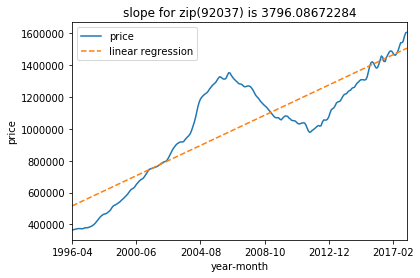

[ 516240.8353409     3796.08672284]
0.0882399019133


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#data=pd.read_csv('Zip_MedianValuePerSqft_AllHomehttp://localhost:8889/notebooks/Desktop/ECE180/ece180_project.ipynb#s.csv')
data=pd.read_csv('Zip_Zhvi_AllHomes.csv')
data_sd = data[data.City == 'San Diego'].dropna(axis=0)
data_sd = data_sd.reset_index(drop=True)
print data_sd
for i in range(6):
    data_clip = data_sd.iloc[i*5:i*5+5,:]
    data_clip = data_clip.set_index(data_clip.RegionName.values)
    data_plt = data_clip.iloc[:,7:]
    plt.figure(i+1)
    data_plt.T.plot()
    plt.show()
plt.figure(7)
f = [[1,k] for k in range(262)]
thetaset1,resd1,rank,s=np.linalg.lstsq(f,data_sd.iloc[10][7:].values)
data_test = data_sd.iloc[10,7:].T
data_test = data_test.to_frame(name = None)
print data_test
x = np.arange(262)
y = thetaset1[0]+thetaset1[1]*x
data_test[1] = y
data_test[10].plot(label='price')
data_test[1].plot(linestyle='--',label='linear regression')
plt.legend()
plt.title('slope for zip({}) is {}'.format(data_sd.RegionName[10],thetaset1[1]))
plt.xlabel(u'year-month')
plt.ylabel(u'price')
plt.show()

print thetaset1[1]/thetaset1[0]*12

In [26]:
slope=[]
for i in range(29):
    theta,resd1,rank,s=np.linalg.lstsq(f,data_sd.loc[i][7:].values)
    #slope.append(theta[1])
    slope.append(theta[1]/theta[0]*12)
print 'The max slope is {}, and its zipcode is {}'.format(max(slope),data_sd.RegionName.values[slope.index(max(slope))])
print thetaset1[0]+thetaset1[1]*0

The max slope is 0.128459407084, and its zipcode is 92104
516240.835341


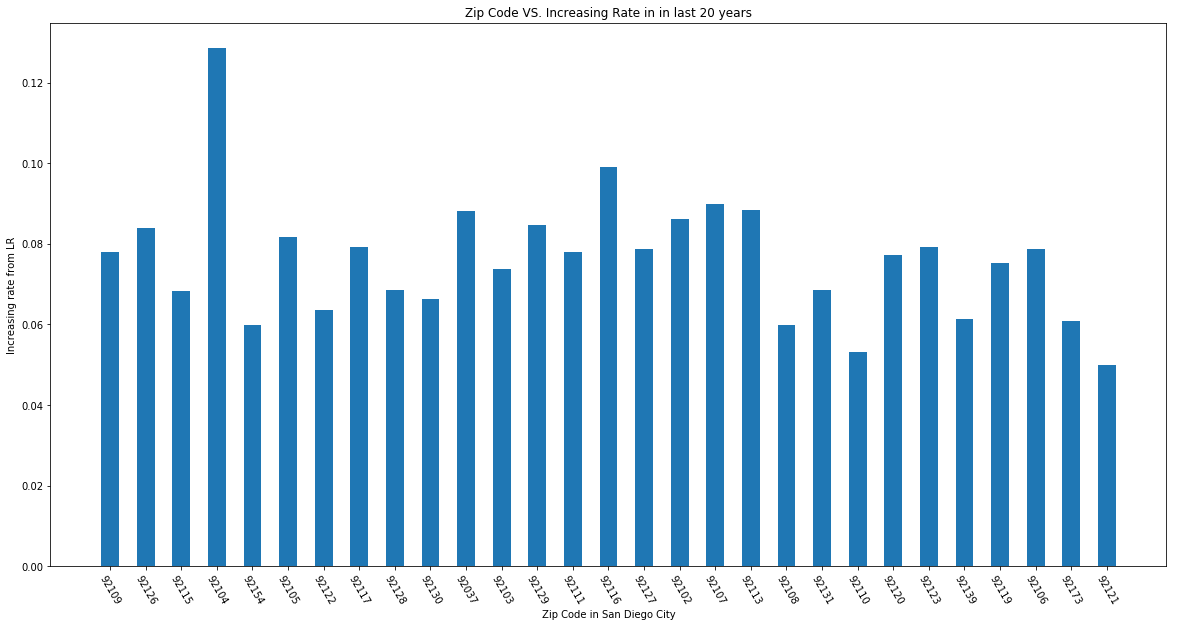

In [27]:
ind=range(29)
plt.figure(figsize=(20,10))
plt.bar(ind,slope,0.5)
plt.xticks(ind,data_sd.RegionName.values,rotation=-60)
plt.xlabel(u'Zip Code in San Diego City')
plt.ylabel(u'Increasing rate from LR')
plt.title('Zip Code VS. Increasing Rate in in last 20 years')
plt.show()